<a href="https://colab.research.google.com/github/Saonoke/machine-learning-2024/blob/main/week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

In [ ]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


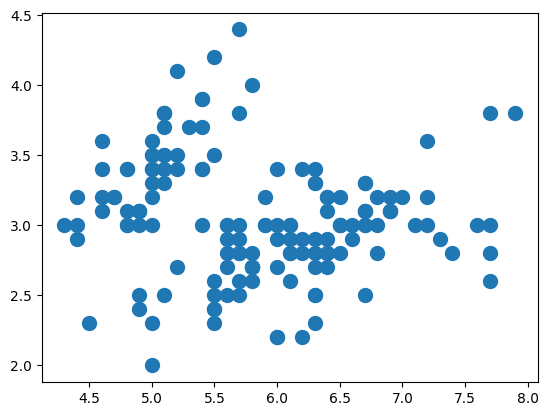

In [ ]:
plt.scatter(X.iloc[:,0], X.iloc[:,1],s = 100)

In [ ]:
# buat model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters =2)

# fit dan predict
y_kmeans = cl_kmeans.fit_predict(X)

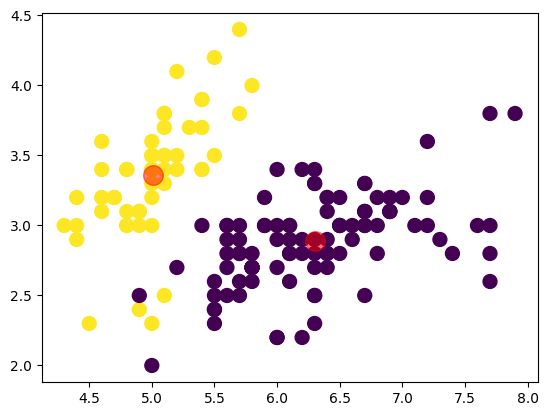

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:,0],X.iloc[:,1],s = 100, c=y_kmeans)

# plot
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)


In [ ]:
print(f'nilai SSE:{cl_kmeans.inertia_}')

nilai SSE:152.36870647733915


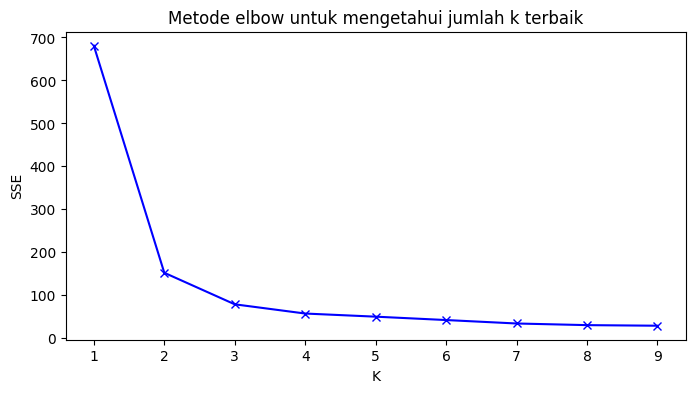

In [ ]:
# implementasi Metode Elbow

# List nilai sse
sse = []

K =range(1,10)

# Cek k nilai terbaik dari 1-10
for k in K:
  kmeanModel = KMeans(n_clusters= k)
  kmeanModel.fit(X)
  sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.title('Metode Elbow')
plt.plot(K, sse, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title("Metode elbow untuk mengetahui jumlah k terbaik")
plt.show()




In [ ]:
# cek nilai sse setiap k
for idx,sse_val in enumerate(sse,start=1):
  print(f'k={idx}; SSE={sse_val}')


k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.4732732654949
k=5; SSE=50.18952210684964
k=6; SSE=42.32699486115529
k=7; SSE=34.299985543844244
k=8; SSE=30.489160868519573
k=9; SSE=29.113357808857817


# Praktikum 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
import numpy as np

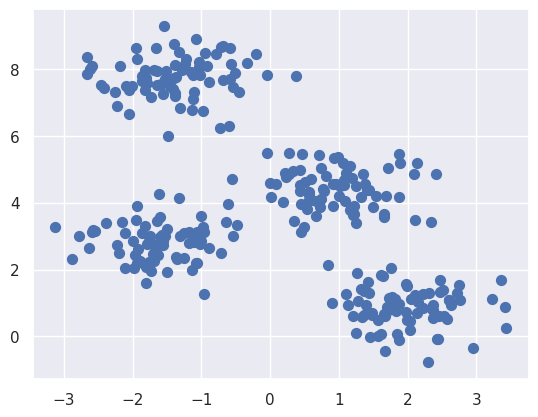

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

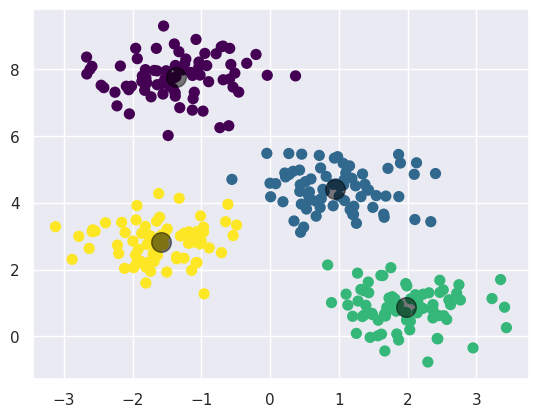

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Algoritma Exception - Maximization

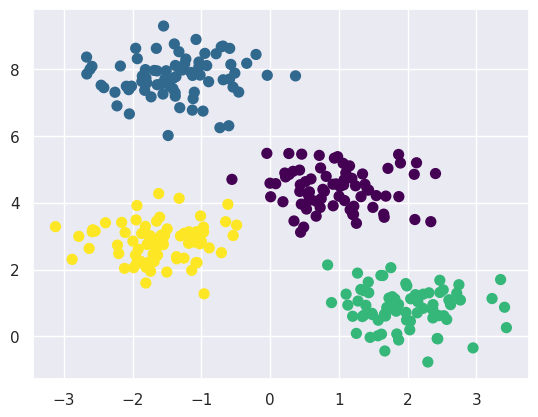

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
      #2a. input label center yang baru
      labels= pairwise_distances_argmin(X,centers)

      #2b. update center dari titik baru
      new_centers = np.array([X[labels == i].mean(0)
                              for i in range(n_clusters)])
      #2c. cek konvergensi
      if np.all(centers == new_centers):
        break
      centers = new_centers
    return centers, labels

centers, labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')



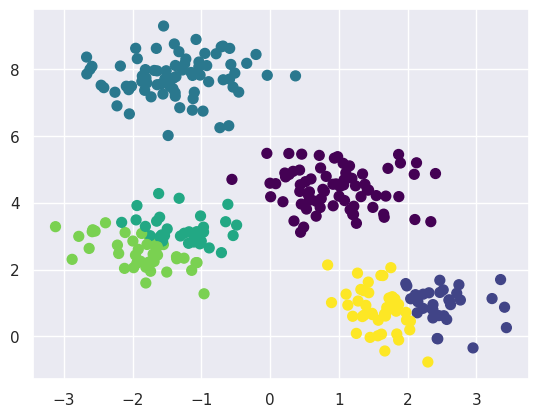

In [ ]:
labels= KMeans(6,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

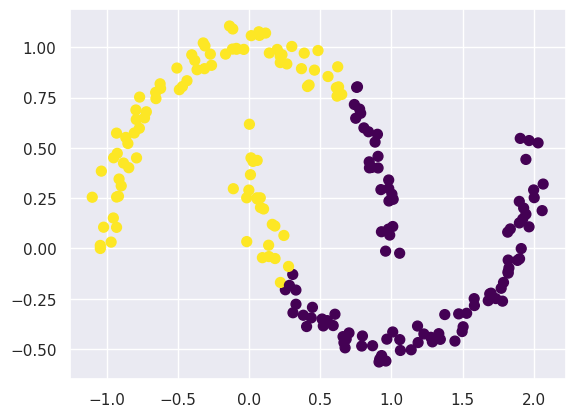

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200,noise=.05,random_state=42)

labels = KMeans(2,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


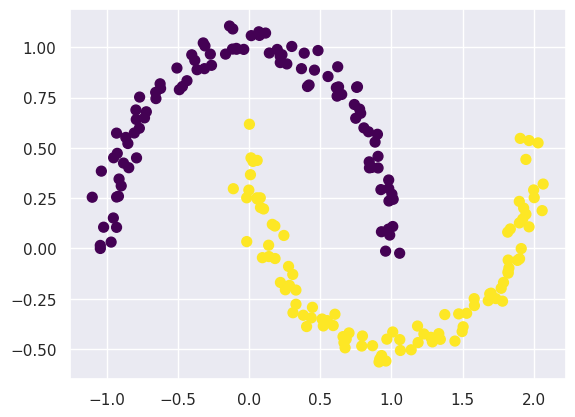

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')

labels = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

# Contoh kasus 1 : Karakter angka

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
kmeans= KMeans(n_clusters=10,random_state=0)
clusters= kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

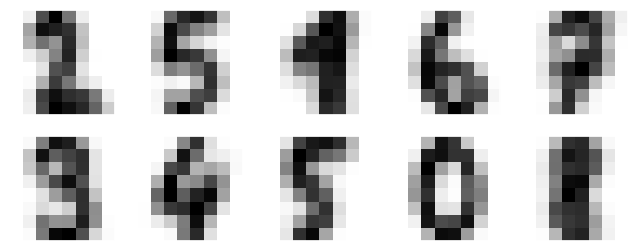

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(8,3))
centers= kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):
  axi.set(xticks=[],yticks=[])
  axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)


In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
  mask = (clusters == i)
  labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target,labels)

0.7440178074568725

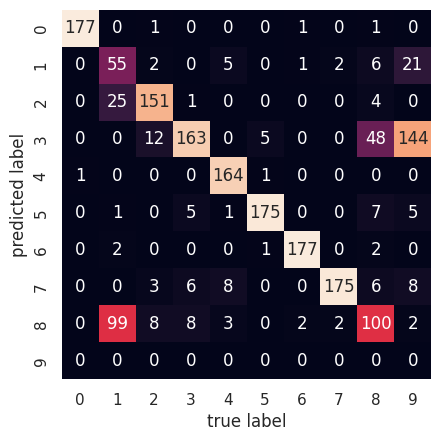

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False, xticklabels=digits.target_names,yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE

tsne =  TSNE(n_components=2,init='random',random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10,random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
  mask = (clusters==i)
  labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target,labels)

0.9415692821368948

# Studi kasus 2 : kompresi citra

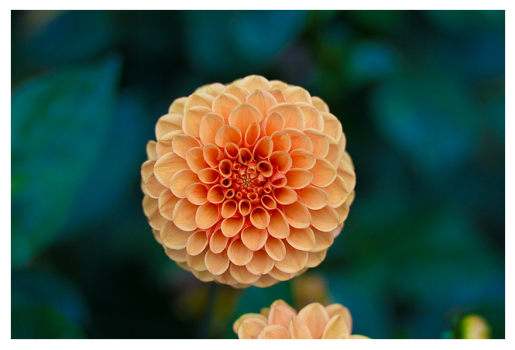

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower/255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

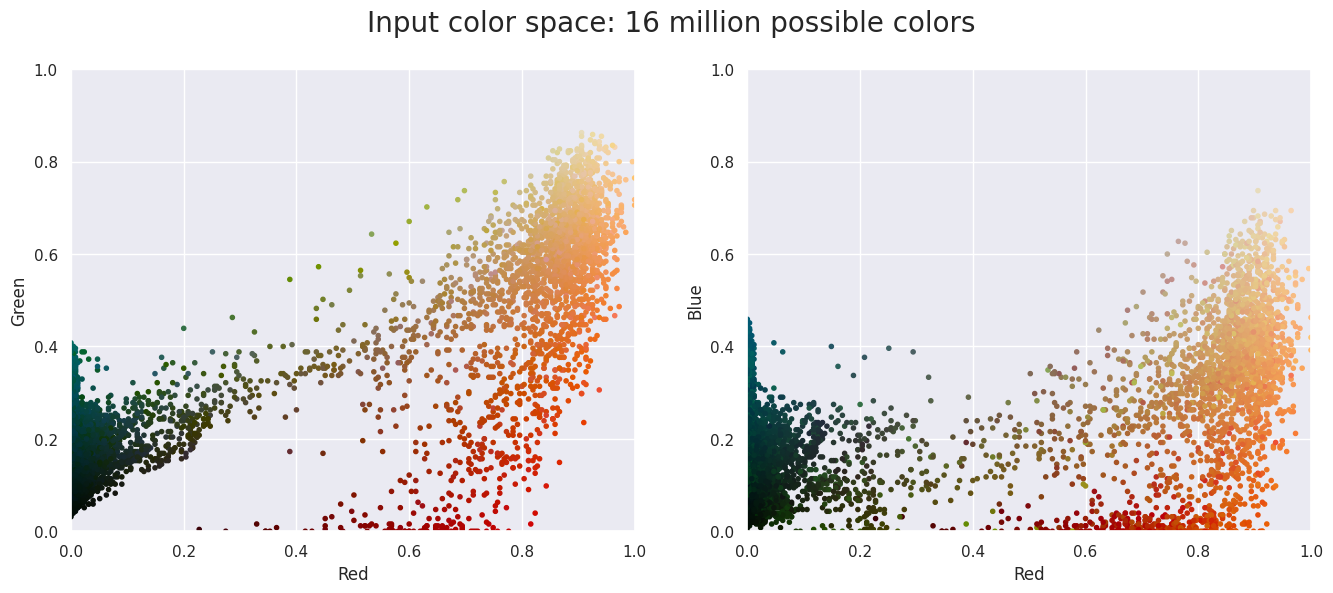

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

plot_pixels(data, title='Input color space: 16 million possible colors')

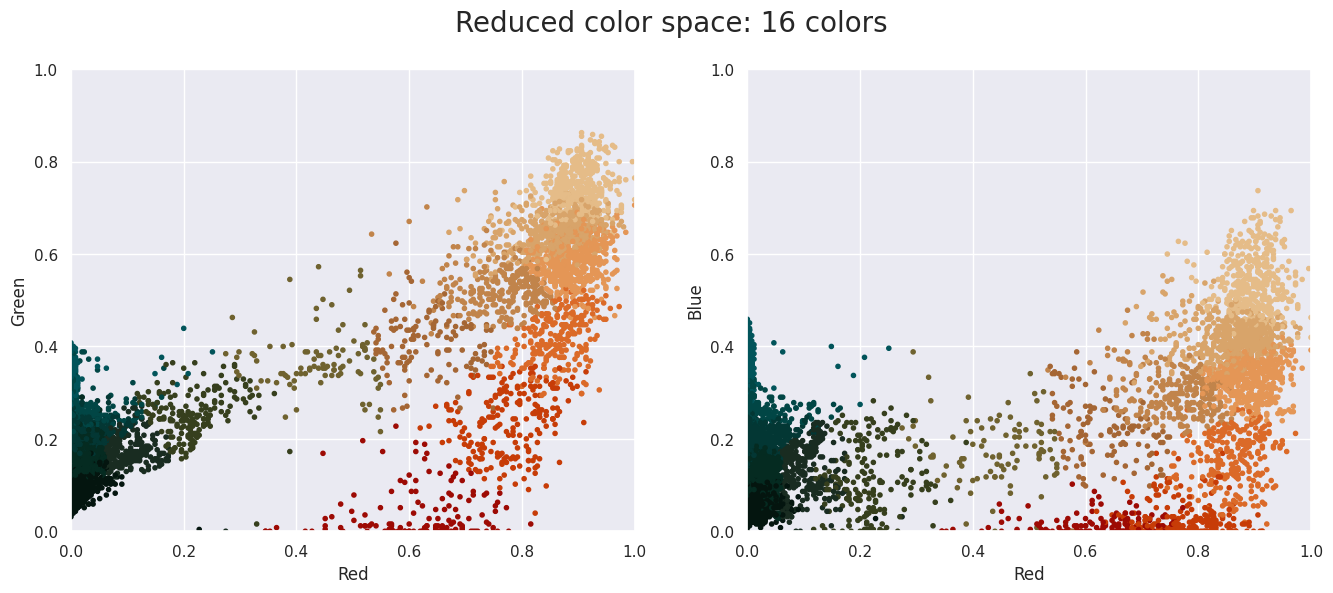

In [ ]:
import warnings; warnings.simplefilter('ignore') #Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

Text(0.5, 1.0, '16-color Image')

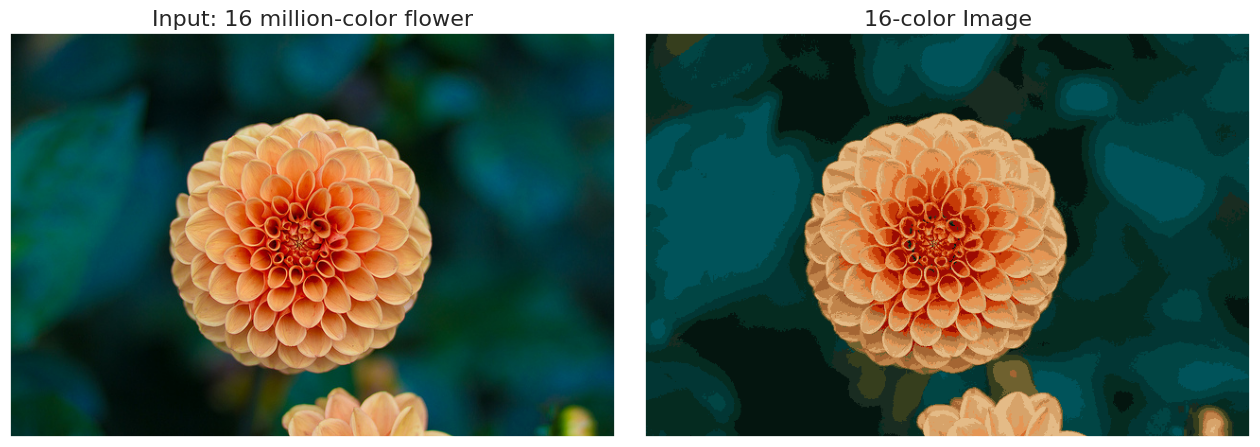

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Input: 16 million-color flower',size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image',size=16)


# Praktikum 3

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=48726d4c899d3ca0e309e27ce5abbca2b448fd13ffc6edf84a126b890bc50591
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


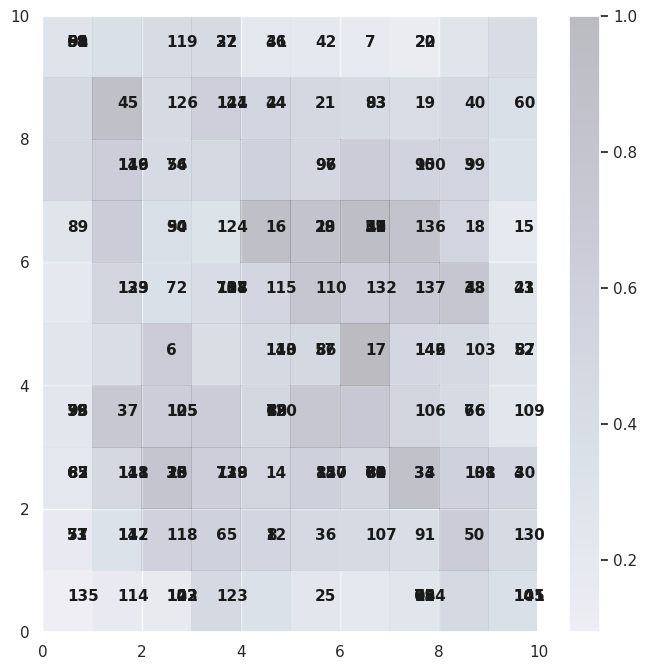

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# load dataset
iris = datasets.load_iris()
data = iris.data

# normalisasi data
data = data / data.max(axis=0)

# Inisialisasi SOM
map_size=(10,10)
som = MiniSom(map_size[0],map_size[1],data.shape[1],sigma=0.5,learning_rate=0.5)

# inisialisasi bobot SOM secara acak
som.random_weights_init(data)

# Pelatihan SOM
num_epoch = 100
som.train_random(data,num_epoch)

# Visualisasi hasil SOM
plt.figure(figsize=(8,8))
for i, x in enumerate(data):
    w = som.winner(x)
    plt.text(w[0]+.5,w[1]+.5,str(i+1),color='k',fontdict={'weight':'bold','size':11})
plt.pcolor(som.distance_map().T, cmap='bone_r',alpha=.2)
plt.colorbar()
plt.show()



# Tugas

In [36]:
data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Soal no 2
Fitur yang digunakan
 - Age dan Annual Income

In [37]:
data.drop(['CustomerID','Gender'],axis=1,inplace=True)
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# le = LabelEncoder()
# data['Gender'] = le.fit_transform(data['Gender'])

X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
X.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=0)

y_kmeans = kmeans.fit_predict(X)

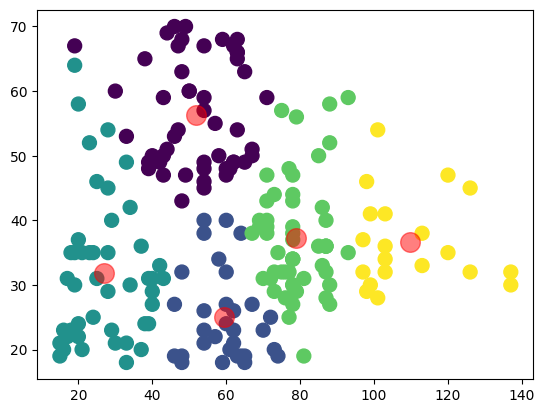

In [40]:
plt.scatter(X.iloc[:,1],X.iloc[:,0],s=100,c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1],centers[:,0],c='red',s=200,alpha=0.5)

In [41]:
# Cek Nilai SSE
print(f'Nilai SSE: {kmeans.inertia_}')

Nilai SSE: 31684.115125448025


Text(0, 0.5, 'SSE')

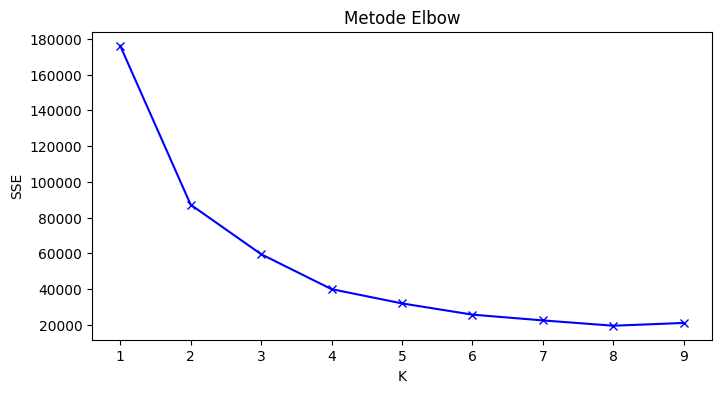

In [42]:
# Implementasi metode Elbow
sse = []

# cari k terbaik
K = range(1,10)

for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  sse.append(kmeanModel.inertia_)

# Plotting
plt.figure(figsize=(8,4))
plt.title('Metode Elbow')
plt.plot(K, sse, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')

In [43]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=176108.77999999997
k=2; SSE=87179.72383252814
k=3; SSE=59486.961439280356
k=4; SSE=39928.03758463071
k=5; SSE=31955.83141740435
k=6; SSE=25664.311702526877
k=7; SSE=22445.52664950419
k=8; SSE=19471.377334336143
k=9; SSE=21032.715459589137
